In [10]:
import numpy as np
import pandas as pd
df = pd.read_csv('mfeat_all.csv')
df = df[['mor0','mor1','pix0','pix2','label']]
train_labels = df['label']
train_labels = np.array(train_labels)
print(train_labels)

train_features = df.iloc[:,:4]
train_features = np.array(train_features)
print(train_features)

print('train_features', train_features.shape)
print('train_labels', train_labels.shape)

df = pd.read_csv('mfeat_test.csv')
df = df[['mor0','mor1','pix0','pix2','label']]
test_labels = df['label']
test_labels = np.array(test_labels)
print(test_labels)

test_features = df.iloc[:,:4]
test_features = np.array(test_features)
print(test_features)

print('test_features', test_features.shape)
print('test_labels', test_labels.shape)

[0 0 0 ... 9 9 9]
[[0.5        0.         0.46524367 0.62290369]
 [0.5        0.         0.39491907 0.65201385]
 [0.5        0.         0.32554509 0.52853792]
 ...
 [0.5        0.16666667 0.73803396 0.48554625]
 [0.5        0.16666667 0.63490655 0.54014768]
 [0.5        0.16666667 0.73927338 0.45616554]]
train_features (1600, 4)
train_labels (1600,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7

In [11]:
df = pd.read_csv('train2.csv')
df = df[['mor0','mor1','pix0','pix2','label']]
print(df.head())

   mor0  mor1      pix0      pix2  label
0   0.5   0.0  0.465244  0.622904      0
1   0.5   0.0  0.394919  0.652014      0
2   0.5   0.0  0.325545  0.528538      0
3   0.5   0.0  0.364325  0.564696      0
4   0.5   0.0  0.393455  0.637822      0


In [40]:
#获取准确率最高的rel_knn_algorithm、rel_weight和rel_nearest_neighbor
from sklearn import neighbors,decomposition
rel_nearest_neighbor = 0
rel_knn_algorithm = ''
rel_weight = ''
knn_algorithms = ['ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
rel_f1 = -1
x = []
y = []
#nearest_neighbor参数范围为1-200
for nearest_neighbor in range(1,101):
    clf = neighbors.KNeighborsClassifier(n_neighbors = nearest_neighbor, weights=weight, algorithm=knn_algorithm)
    clf = clf.fit(train_features, train_labels)

    pre = clf.predict(test_features)
    F1_score = f1_score(test_labels, pre, average='micro' )
    x.append(nearest_neighbor)
    y.append(F1_score)
    #print('knn_algorithm =',knn_algorithm,',nearest_neighbors =', nearest_neighbor,',weight =',weight,  ',accuracy=', accuracy)
    if F1_score >= rel_f1:
        rel_f1 = F1_score
        rel_knn_algorithm =knn_algorithm
        rel_weight = weight
        rel_nearest_neighbor = nearest_neighbor
        
print('rel_knn_algorithm：',rel_knn_algorithm)
print('rel_weight：',rel_weight)
print('rel_nearest_neighbor：',rel_nearest_neighbor)
print('f1-score',rel_f1)

rel_knn_algorithm： brute
rel_weight： distance
rel_nearest_neighbor： 10
f1-score 0.8575


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score

clf = neighbors.KNeighborsClassifier(n_neighbors =  rel_nearest_neighbor, weights=rel_weight, algorithm=rel_knn_algorithm)
clf = clf.fit(train_features, train_labels)

label_predict = clf.predict(test_features)
"""预测结果"""
print("Predict_rlt:",label_predict)
"""预测准确个数"""
print("Correct_no:",sum(label_predict==test_labels))
"""预测准确率"""
print("Accuracy:",sum(label_predict==test_labels)/len(test_labels))

#以下代码用交叉验证的方法计算KNN在该数据集分类预测中的准确性
knn = KNeighborsClassifier(n_neighbors=1)
score_knn_accuracy = np.mean(cross_val_score(estimator=knn, X=train_features, y=train_labels, cv=5, scoring='accuracy'))
print("Score_accuracy:",score_knn_accuracy)

F1_score = f1_score( test_labels, label_predict, average='micro' )
precision = precision_score(test_labels, label_predict, average='micro')
recall = recall_score(test_labels, label_predict, average='micro')

print("F1_score：",F1_score)
print("precision：",precision)
print("recall：",recall)

Predict_rlt: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 7 3 7 7 7 3 7 7 3 3 3 7 7 7 3 3 3 7 3 7 3 3 7 7 3 7 7 7 7 7 7
 7 7 7 7 3 7 7 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 5 5 4 4 4 4 5 4 5 4 4 4 4 4 4 4 4 4 4 4
 4 4 5 5 4 5 4 4 4 4 4 4 4 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 3 7 7 7 7 7 3 7 7 7 7 7 7 7 7 7
 7 7 7 3 7 7 7 7 7 3 7 7 7 7 7 7 7 7 7 7 7 3 7 3 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 2 2 9 9 9 9 9 9]
Correct_no: 343
Accuracy: 0.8575
Score_accuracy: 0.8943749999999999
F1_score： 0.8575
precision： 0.8575
recall： 0.8575


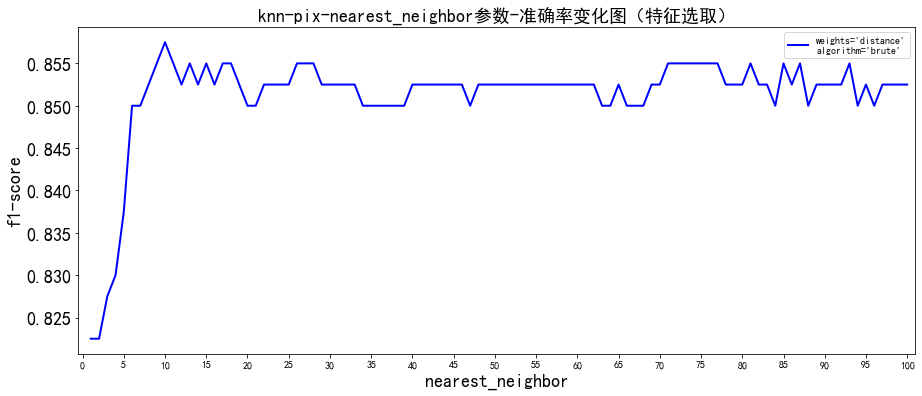

In [41]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
from matplotlib.pyplot import MultipleLocator
#从pyplot导入MultipleLocator类，这个类用于设置刻度间隔

#X轴，Y轴数据
# x = [0,1,2,3,4,5,6]
# y = [0.3,0.4,2,5,3,4.5,4]
plt.figure(figsize=(15,6)) #创建绘图对象
plt.plot(x,y,"b",linewidth=2,label="weights='distance'\nalgorithm='brute'")   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
# plt.xticks(x, x)
plt.yticks(size=18)
plt.xlabel("nearest_neighbor",size=18) #X轴标签
plt.ylabel("f1-score",size=18)  #Y轴标签
plt.title("knn-pix-nearest_neighbor参数-准确率变化图（特征选取）",size=18) #图标题
plt.legend()  # 让图例生效
# # 设置数字标签
# for a, b in zip(x, y):
#     plt.text(a, b, b, ha='center', va='bottom')
x_major_locator=MultipleLocator(5)
#把x轴的刻度间隔设置为1，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(-0.5,101)
#把x轴的刻度范围设置为-0.5到11，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白

plt.savefig("knn-pix-nearest_neighbor参数选择图（特征选取）.png") #保存图
plt.show()  #显示图